In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, classification_report

data = pd.read_csv("/content/train.csv")

In [ ]:
data.drop(columns=['Id'], inplace=True) #already labaled and categorized

In [ ]:
data

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15115,2607,243,23,258,7,660,170,251,214,1282,...,0,0,0,0,0,0,0,0,0,3
15116,2603,121,19,633,195,618,249,221,91,1325,...,0,0,0,0,0,0,0,0,0,3
15117,2492,134,25,365,117,335,250,220,83,1187,...,0,0,0,0,0,0,0,0,0,3
15118,2487,167,28,218,101,242,229,237,119,932,...,0,0,0,0,0,0,0,0,0,3


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 55 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Elevation                           15120 non-null  int64
 1   Aspect                              15120 non-null  int64
 2   Slope                               15120 non-null  int64
 3   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 4   Vertical_Distance_To_Hydrology      15120 non-null  int64
 5   Horizontal_Distance_To_Roadways     15120 non-null  int64
 6   Hillshade_9am                       15120 non-null  int64
 7   Hillshade_Noon                      15120 non-null  int64
 8   Hillshade_3pm                       15120 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 10  Wilderness_Area1                    15120 non-null  int64
 11  Wilderness_Area2                    15120 non-null  int64
 12  Wild

SOIL 8 and 25 High Positive , all three hillside negative

In [ ]:
#ensure there are no missing values
data.isnull().values.any()

False

In [ ]:
data['Cover_Type'].value_counts()

5    2160
2    2160
1    2160
7    2160
3    2160
6    2160
4    2160
Name: Cover_Type, dtype: int64

In [ ]:
data['Cover_Type'].replace({1:'Spruce/Fir', 2:'Lodgepole Pine', 3:'Ponderosa Pine',
                            4:'Cottonwood/Willow',5:'Aspen',6:'Douglas-fir',7:'Krummholz'}, inplace=True)
df = pd.DataFrame(data['Cover_Type'])

df.head(11)

,Cover_Type
0,Aspen
1,Aspen
2,Lodgepole Pine
3,Lodgepole Pine
4,Aspen
5,Lodgepole Pine
6,Aspen
7,Aspen
8,Aspen
9,Aspen


In [ ]:
#understandinf the distruibution between the trees within the forest

data['Wild Areas'] = (data.iloc[:,10:15] == 1).idxmax(1)
data['Soil types'] = (data.iloc[:,15:55] == 1).idxmax(1)

**____________________________________________________________________________________________________________________________________________________________**

This much data is taken from the 4 Wilderness areas The wilderness areas are:

1 - Rawah Wilderness Area
2 - Neota Wilderness Area
3 - Comanche Peak Wilderness Area
4 - Cache la Poudre Wilderness Area



Elevation is simialr within all of the trees the distince trees.



<ipython-input-9-2f194fb9fc01>:25: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(temp[col], label=[cover_type])
<ipython-input-9-2f194fb9fc01>:25: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(temp[col], label=[cover_type])
<ipython-input-9-2f194fb9fc01>:25: UserWarning: 

`distplot` is a deprec

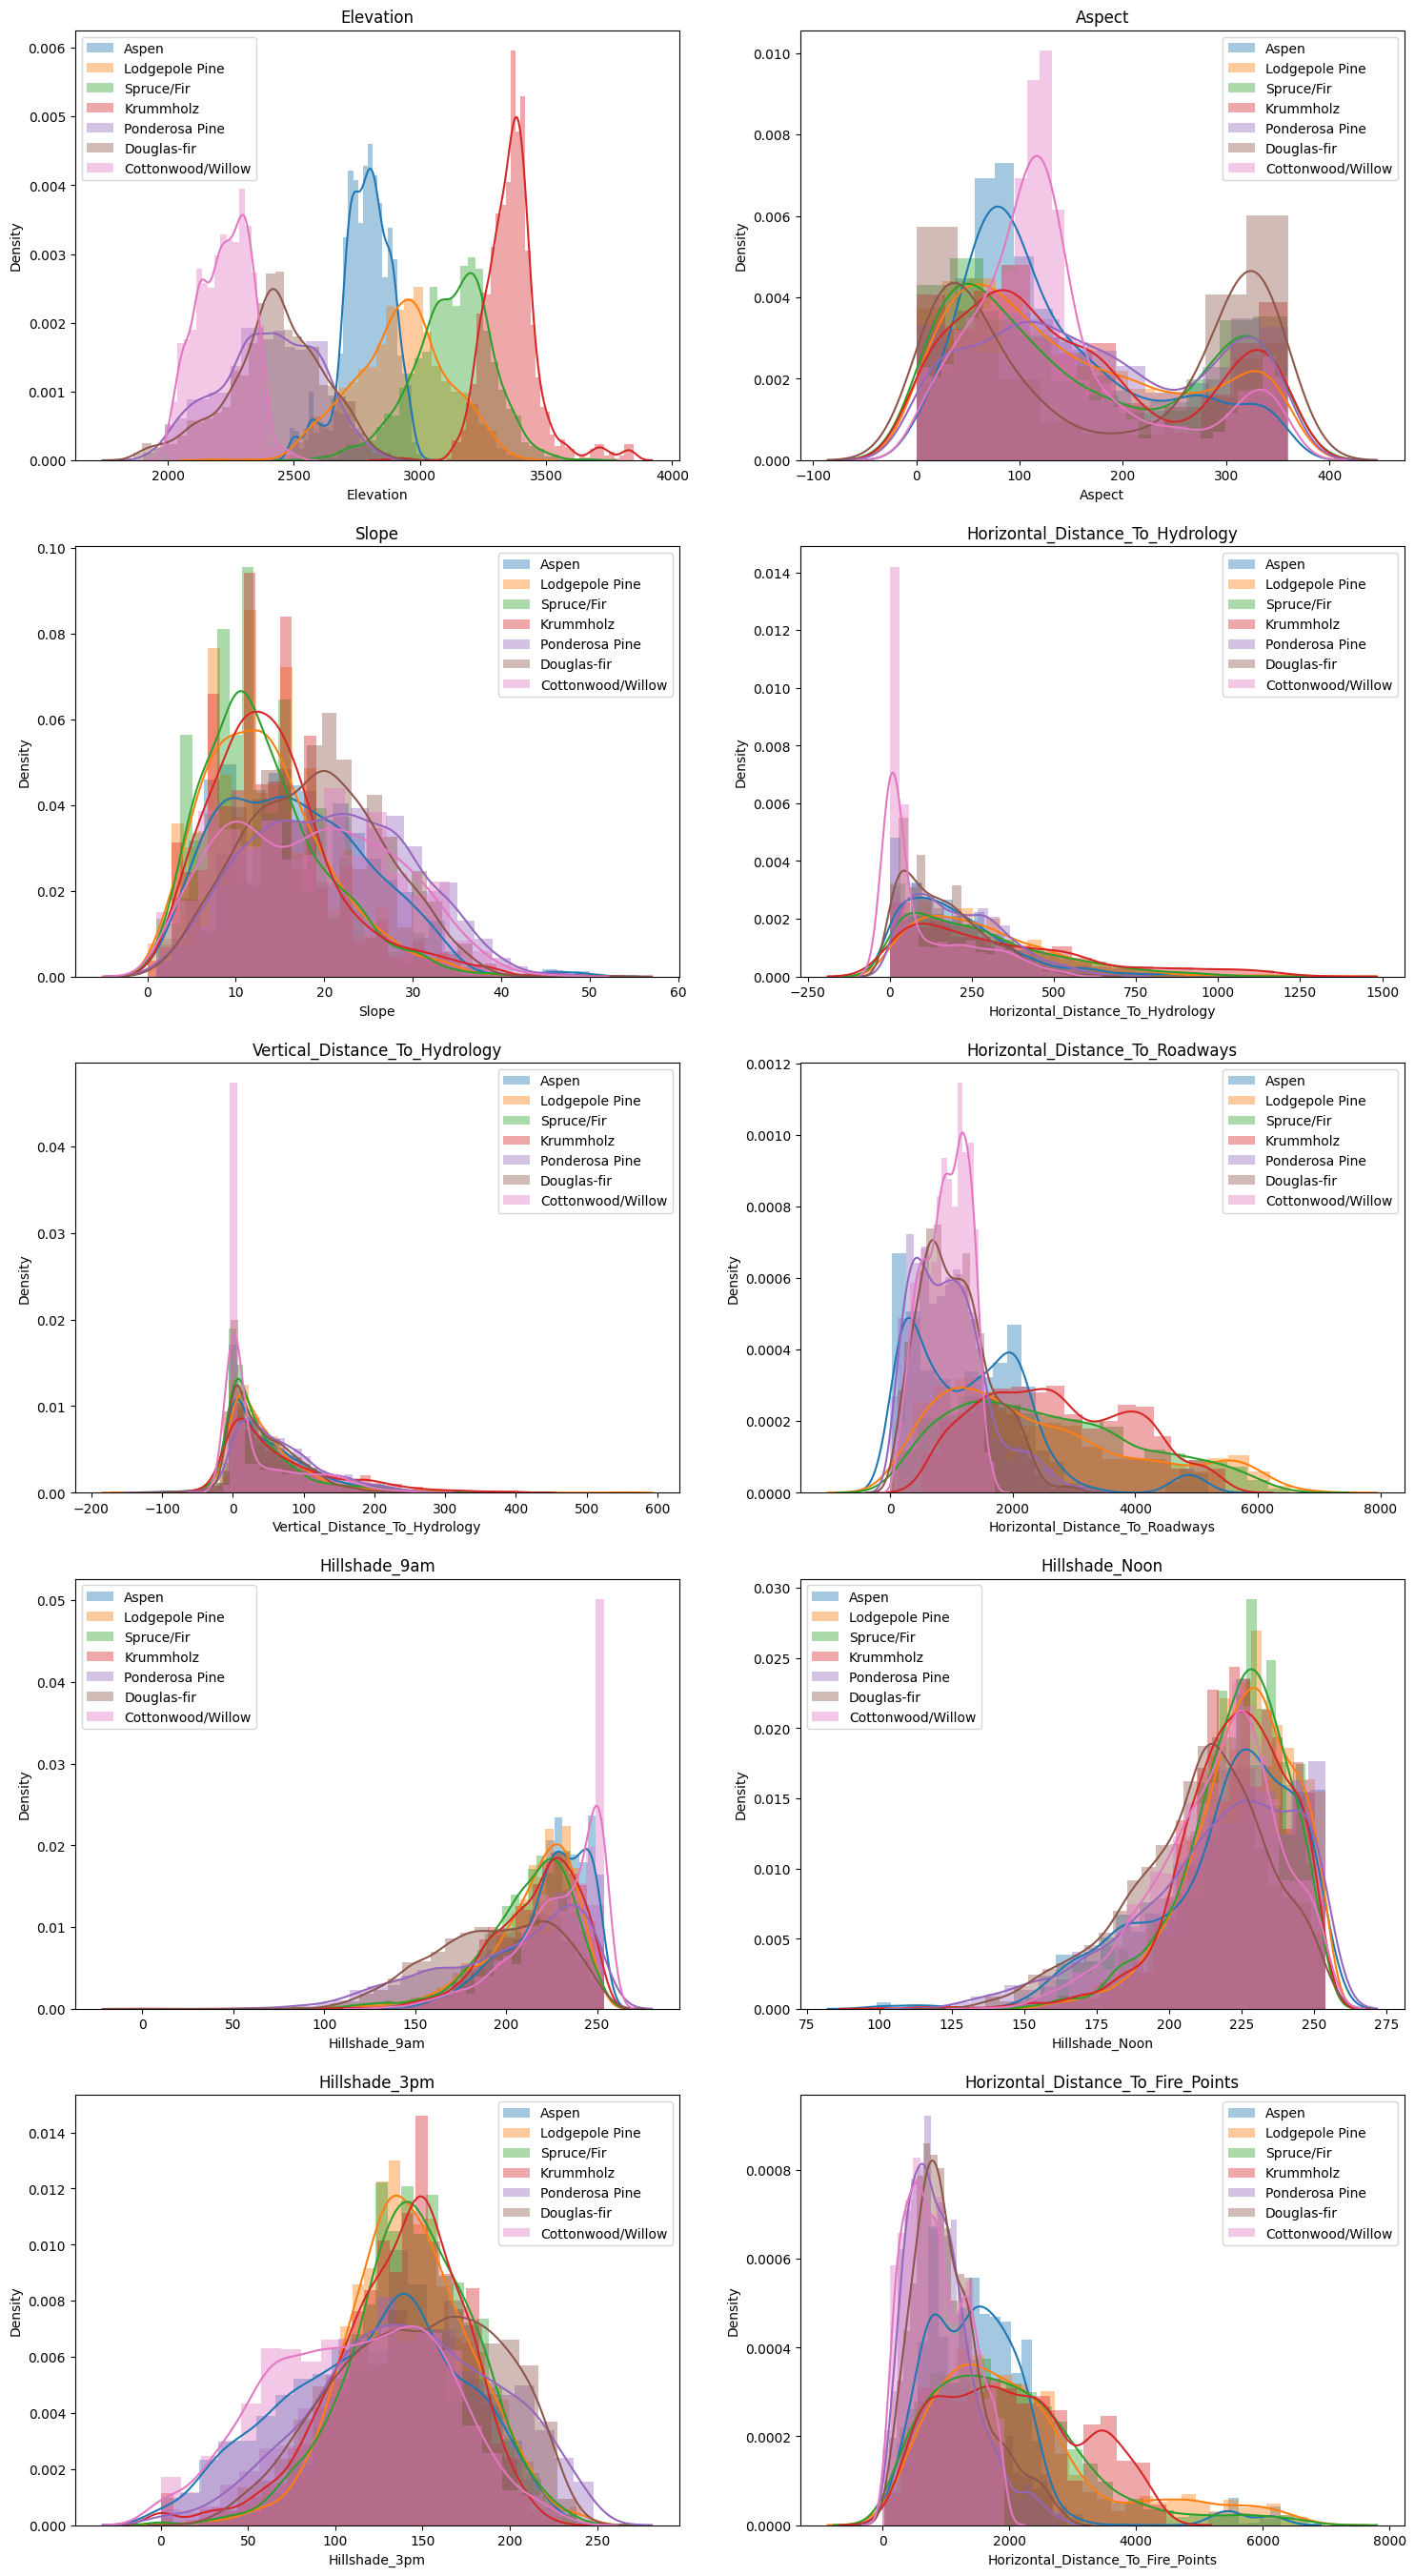

In [ ]:
# Import necessary libraries
import math
import seaborn as sns
import matplotlib.pyplot as plt

# Select only continuous columns from your DataFrame (dtrain)
d_train_cont = data.iloc[:, :10]

# Get unique cover types from the 'Cover_Type' column
targets = data['Cover_Type'].unique()

# Create a figure for the subplots
fig = plt.figure()
height = 34
width = 18
fig.set_figheight(height)
fig.set_figwidth(width)

# Loop through each continuous variable
for i, col in enumerate(d_train_cont.columns):
    ax = fig.add_subplot(math.ceil(len(d_train_cont.columns) / 2), 2, i + 1)

    for cover_type in targets:
        temp = d_train_cont.loc[data['Cover_Type'] == cover_type]
        sns.distplot(temp[col], label=[cover_type])

    ax.legend()
    ax.set_title(col)

# Show the plot
plt.show()

In [ ]:
import plotly.express as px


fig = px.histogram(data,x="Wild Areas",color="Cover_Type",barmode="group",
                 height=400,width=800)

fig.show()




1 - Rawah Wilderness Area
2 - Neota Wilderness Area with the least amount of tree coverage
3 - Comanche Peak Wilderness Area
4 - Cache la Poudre Wilderness Area with those most cottonwood trees


In [ ]:
import plotly.express as px

fig = px.histogram(data,x="Soil types",color="Cover_Type",height=400,width=850)
fig.show()

fig = px.pie(data,names="Soil types",height=400,width=850)
fig.update_traces(textposition='inside')
fig.show()

In [ ]:
#Numerical Features
num_features = data.iloc[:,:10]
num_features = num_features.corr()

<Axes: >

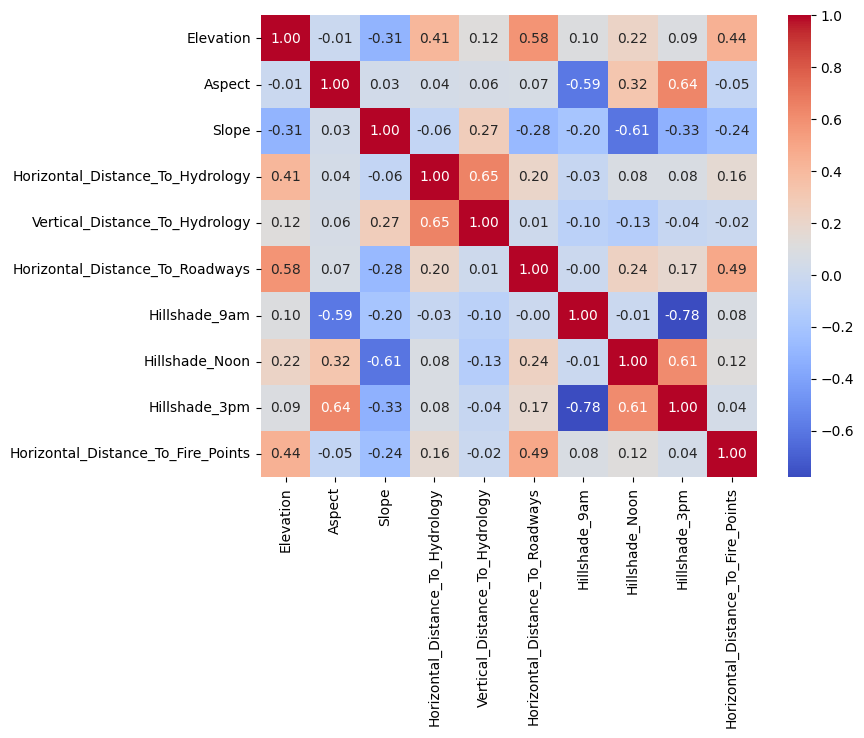

In [ ]:
fig=plt.figure(figsize=(8,6))
sns.heatmap(num_features,annot=True,cmap='coolwarm',fmt=".2f" )

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

data = pd.read_csv("/content/train.csv")

# Split the data
X = data.drop("Cover_Type", axis=1)
y = data["Cover_Type"]


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Logistic Regression classifier
logistic_classifier = LogisticRegression(max_iter=1000)

# Fit the Logistic Regression model to the training data
logistic_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logistic_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the evaluation results
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)


Accuracy: 0.5439814814814815
Classification Report:
               precision    recall  f1-score   support

           1       0.44      0.42      0.43       421
           2       0.48      0.46      0.47       438
           3       0.50      0.43      0.46       428
           4       0.70      0.82      0.76       449
           5       0.53      0.58      0.56       416
           6       0.40      0.36      0.38       432
           7       0.67      0.73      0.70       440

    accuracy                           0.54      3024
   macro avg       0.53      0.54      0.54      3024
weighted avg       0.53      0.54      0.54      3024



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
#SVM
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


data = pd.read_csv("/content/train.csv")

# Split the data
X = data.drop("Cover_Type", axis=1)
y = data["Cover_Type"]

# training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a linear SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)

# Fit the SVM model to the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the evaluation results
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Accuracy: 0.7228835978835979
Classification Report:
               precision    recall  f1-score   support

           1       0.67      0.71      0.69       421
           2       0.66      0.53      0.59       438
           3       0.62      0.57      0.59       428
           4       0.78      0.90      0.83       449
           5       0.74      0.83      0.78       416
           6       0.65      0.64      0.65       432
           7       0.91      0.89      0.90       440

    accuracy                           0.72      3024
   macro avg       0.72      0.72      0.72      3024
weighted avg       0.72      0.72      0.72      3024



In [ ]:
#KNN
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report


X = data.drop("Cover_Type", axis=1)
y = data["Cover_Type"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)

knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)


Accuracy: 0.7738095238095238
Classification Report:
               precision    recall  f1-score   support

           1       0.68      0.65      0.66       421
           2       0.70      0.58      0.63       438
           3       0.72      0.69      0.70       428
           4       0.83      0.95      0.89       449
           5       0.78      0.88      0.83       416
           6       0.75      0.71      0.73       432
           7       0.92      0.95      0.93       440

    accuracy                           0.77      3024
   macro avg       0.77      0.77      0.77      3024
weighted avg       0.77      0.77      0.77      3024



In [ ]:
#Decision Tree
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report


# Split the data into features (X) and target variable (y)
X = data.drop("Cover_Type", axis=1)
y = data["Cover_Type"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree classifier
decision_tree_classifier = DecisionTreeClassifier(random_state=42)

# Fit the Decision Tree model to the training data
decision_tree_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = decision_tree_classifier.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)


Accuracy: 0.8068783068783069
Classification Report:
               precision    recall  f1-score   support

           1       0.66      0.66      0.66       421
           2       0.65      0.63      0.64       438
           3       0.81      0.78      0.79       428
           4       0.94      0.96      0.95       449
           5       0.87      0.89      0.88       416
           6       0.79      0.82      0.80       432
           7       0.90      0.91      0.91       440

    accuracy                           0.81      3024
   macro avg       0.80      0.81      0.80      3024
weighted avg       0.81      0.81      0.81      3024



In [ ]:
#adaBoost
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split the data into features (X) and target variable (y)
X = data.drop("Cover_Type", axis=1)
y = data["Cover_Type"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
base_classifier = DecisionTreeClassifier(max_depth=1)  # A simple decision tree with limited depth

# Create an AdaBoost classifier with the base classifier
adaboost_classifier = AdaBoostClassifier(base_classifier, n_estimators=50, random_state=42)
adaboost_classifier.fit(X_train, y_train)

y_pred = adaboost_classifier.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)


Accuracy: 0.34656084656084657
Classification Report:
               precision    recall  f1-score   support

           1       0.33      0.46      0.38       421
           2       0.47      0.08      0.13       438
           3       0.50      0.02      0.04       428
           4       0.00      0.00      0.00       449
           5       0.39      0.83      0.53       416
           6       0.29      0.87      0.43       432
           7       0.56      0.21      0.31       440

    accuracy                           0.35      3024
   macro avg       0.36      0.35      0.26      3024
weighted avg       0.36      0.35      0.26      3024



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
#MLP
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

X = data.drop("Cover_Type", axis=1)
y = data["Cover_Type"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (recommended for MLP)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create an MLP classifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)

mlp_classifier.fit(X_train, y_train)
y_pred = mlp_classifier.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)


Accuracy: 0.8392857142857143
Classification Report:
               precision    recall  f1-score   support

           1       0.74      0.71      0.72       421
           2       0.73      0.71      0.72       438
           3       0.81      0.84      0.82       428
           4       0.93      0.92      0.92       449
           5       0.87      0.94      0.90       416
           6       0.83      0.82      0.83       432
           7       0.95      0.95      0.95       440

    accuracy                           0.84      3024
   macro avg       0.84      0.84      0.84      3024
weighted avg       0.84      0.84      0.84      3024



In [ ]:
data['Cover_Type'] =data['Cover_Type'] - 1

In [ ]:
#LightGBM
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report



# Split the data into features (X) and target variable (y)
X = data.drop("Cover_Type", axis=1)
y = data["Cover_Type"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train)

# Define hyperparameters for the LightGBM model
params = {
    "objective": "multiclass",
    "num_class": 7,  # Number of classes (Forest Cover Types)
    "boosting_type": "gbdt",
    "metric": "multi_logloss",
    "num_leaves": 31,
    "learning_rate": 0.05,
    "feature_fraction": 0.9
}

# Create a LightGBM classifier
lgb_classifier = lgb.train(params, train_data, num_boost_round=100)

# Make predictions on the test set
y_pred = lgb_classifier.predict(X_test, num_iteration=lgb_classifier.best_iteration)
y_pred_class = [list(x).index(max(x)) for x in y_pred]  # Convert probabilities to class labels

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_class)
classification_rep = classification_report(y_test, y_pred_class)

# Print the evaluation results
print("\nAccuracy", accuracy, '\n')
print("Classification Report:\n", classification_rep)


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001633 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2414
[LightGBM] [Info] Number of data points in the train set: 12096, number of used features: 45
[LightGBM] [Info] Start training from score -1.939565
[LightGBM] [Info] Start training from score -1.949388
[LightGBM] [Info] Start training from score -1.943598
[LightGBM] [Info] Start training from score -1.955797
[LightGBM] [Info] Start training from score -1.936693
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.950551

Accuracy 0.8637566137566137 

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.75      0.75       421
           1       0.78      0.67      0.72       438
           2       0.86      0.86      0.86       428
           3       0.95      0.98      0.96       449
    

In [ ]:
unique_cover_types = sorted(data['Cover_Type'].unique())
print("Unique Cover Types:", unique_cover_types)

Unique Cover Types: [0, 1, 2, 3, 4, 5, 6]


In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the top 3 models
logistic_classifier = LogisticRegression(max_iter=1000, random_state=42)
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
gradient_boosting_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Create the Voting Classifier
voting_classifier = VotingClassifier(
    estimators=[
        ('KNN', knn_classifier),
        ('DectionTree', decision_tree_classifier),
        ('MPL', mlp_classifier)
    ]
)

# Fit the Voting Classifier to your training data
voting_classifier.fit(X_train, y_train)

# Make predictions using the Voting Classifier
y_pred = voting_classifier.predict(X_test)

# Evaluate the performance of the ensemble model (e.g., calculate accuracy, classification report)
accuracy = accuracy_score(y_test, y_pred)

# Print the evaluation results
print("TOP3:", accuracy)


TOP3: 0.8250661375661376


In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and configure the top 5 classifiers
knn_classifier = KNeighborsClassifier(n_neighbors=5)
decision_tree_classifier = DecisionTreeClassifier(random_state=42)
mlp_classifier = MLPClassifier(max_iter=1000, random_state=42)
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)
logistic_classifier = LogisticRegression(max_iter=1000, random_state=42)

# Create the Voting Classifier with the top 5 classifiers
voting_classifier = VotingClassifier(
    estimators=[
         ('KNN', knn_classifier),
         ('DecisionTree', decision_tree_classifier),
         ('MPL', mlp_classifier),
         ('SVM', svm_classifier),
         ('LinearRegression', logistic_classifier)
    ]
)

# Fit the Voting Classifier to your training data
voting_classifier.fit(X_train, y_train)

# Make predictions using the Voting Classifier
y_pred = voting_classifier.predict(X_test)

# Evaluate the performance of the ensemble model (e.g., calculate accuracy)
accuracy = accuracy_score(y_test, y_pred)

# Print the evaluation result
print("TOP5:", accuracy)
